# Esame di Metodi Numerici - 6 Luglio 2023
## Turno II -- Ore 11.45

## Esercizio 1


Nel file ``Test_II.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. Risolvere i 3 sistemi lineari aventi ciascuno di essi come matrice dei coefficienti A1 e termine noto b1, A2 e termine noto b2, A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.
Verificare se le matrici sono malcondizionate, dire teoricamente cosa questo implica e verificarlo sperimentalmente.


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_II.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

In [2]:
from scipy.io import loadmat

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from RisolviSis import Lsolve, Usolve

In [3]:
dati = loadmat('Test_II.mat')
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

A2=dati["A2"] 
A2=A2.astype(float)
b2=dati["b2"]
b2=b2.astype(float)

A3=dati["A3"] 
A3=A3.astype(float)
b3=dati["b3"]
b3=b3.astype(float)

matrices = [
    A1, A2, A3
]

coeffs = [
    b1, b2, b3
]

def is_square(A):
    return A.shape[0] == A.shape[1]
    
def is_def_pos(A):
    def is_symm(A):
       return np.allclose(A, A.T, atol=np.spacing(1))
    return is_symm(A) and np.all(np.linalg.eigvals(A) > 0)

def is_dd(A):
    d = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=0)
    return np.all(d > row_sum - d)

def is_sparse(A):
    return np.count_nonzero(A) / A.size < .33

def has_max_rank(A):
    return A.shape[1] == np.linalg.matrix_rank(A)

for idx, A in enumerate(matrices):
    mat_name = f"A{idx + 1}"
    print(f"=== Caratteristiche matrice {mat_name} ===")
    print("1. Dimensioni ('m' righe, 'n' colonne) —", A.shape)
    print("2. Quadrata?", is_square(A))
    print("3. Sparsa?", is_sparse(A))
    if is_square(A):
        print("4. Definita positiva?", is_def_pos(A))
        print("5. Diagonale strettamente dominante?", is_dd(A))
    else:
        print("4. Rango massimo?", has_max_rank(A))
    print("> Condizionamento: ", np.linalg.cond(A))
    print()

=== Caratteristiche matrice A1 ===
1. Dimensioni ('m' righe, 'n' colonne) — (15, 15)
2. Quadrata? True
3. Sparsa? False
4. Definita positiva? True
5. Diagonale strettamente dominante? False
> Condizionamento:  16801108.667840794

=== Caratteristiche matrice A2 ===
1. Dimensioni ('m' righe, 'n' colonne) — (15, 6)
2. Quadrata? False
3. Sparsa? False
4. Rango massimo? True
> Condizionamento:  9.99999999999999

=== Caratteristiche matrice A3 ===
1. Dimensioni ('m' righe, 'n' colonne) — (225, 225)
2. Quadrata? True
3. Sparsa? True
4. Definita positiva? False
5. Diagonale strettamente dominante? True
> Condizionamento:  1.185268011766112



### Osservazioni
#### - Matrice A1
La matrice è quadrata, piccola e densa. Quindi, in generale, il sistema lineare associato si presta ad essere risolto con i metodi diretti — che si basano sulla fattorizzazione di $A$ in due matrici, chiamiamole $B$ e $C$.
Tra i possibili metodi troviamo:
- fattorizzazione di Gauss $L \cdot U$, dove $L$ è una matrice triangolare inferiore con diagonale a 1 e $U$ triangolare superiore.
- fattorizzazione di Householder $Q \cdot R$, dove $Q$ è una matrice ortogonale e $R$ è triangolare superiore.
- fattorizzazione di Cholesky $L \cdot L^T$ (oppure $R^T \cdot R$), dove $L$ è una matrice triangolare inferiore con diagonale positiva

Tra i tre metodi, quello che sfrutta la caratteristica di A1 di essere definita positiva è Cholesky — che scelgo di implementare.

Matrice altamente mal condizionata!

#### - Matrice A2
La matrice non è quadrata, quindi il sistema associato è un sistema lineare sovradeterminato. La matrice ha rango massimo, quindi sicuramente posso scartare il metodo "Singular Value Decomposition" adatto a matrici singolari.

La matrice è ben condizionata, quindi il metodo delle Equazioni Normali prevale rispetto a QR Least Squares.

#### - Matrice A3
Matrice ben condizionata, grande e sparsa, sinonimo di metodi iterativi. Non è definita positiva, ma è a diagonale strettamente dominante — Jacobi è il metodo ideale in questo caso.

In [8]:
def solve_cholesky(A, b):
    L = sc.linalg.cholesky(A, lower=True)
    y, flag = Lsolve(L, b)
    if flag == 0:
        return Usolve(L.T, y)[0]
    return None

# Soluzione A1
print(solve_cholesky(A1, b1))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [5]:
def eq_norm(A, b):
    G = A.T @ A
    return solve_cholesky(G, A.T @ b)

# Soluzione A2
print(eq_norm(A2, b2))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


Risultato: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Calcolato in 16/20000 iterazioni


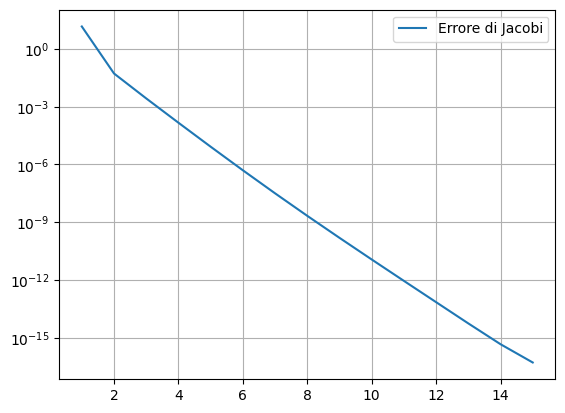

In [22]:
def jacobi(A, b, x0, maxit, toll=np.spacing(1)):
    d = np.diag(A)
    D = np.diag(d)
    L = np.tril(A, -1)
    U = np.triu(A, 1)

    M = D
    N = -(U + L)

    T = np.linalg.inv(M) @ N
    q = np.linalg.inv(M) @ b

    x_curr = x0.copy()
    attempts = [ x_curr.copy() ]
    errors = [ np.inf ]
    
    while len(attempts) < maxit:
        x_next = T @ x_curr + q
        attempts.append(x_next.copy())
        
        error = np.linalg.norm(x_next - x_curr) / (np.linalg.norm(x_curr) if np.linalg.norm(x_curr) != 0 else 1)
        errors.append(error)

        if np.abs(error) < toll:
            break
        
        x_curr = x_next

    return attempts[-1], len(attempts), errors

# Soluzione A3
x0 = np.zeros(A3.shape[1])
maxit=20_000
jac_res, jac_attempts, jac_errors = jacobi(A3, b3.reshape((A3.shape[1])), x0, 20_000)
print("Risultato:", jac_res)
print(f"Calcolato in {jac_attempts}/{maxit} iterazioni")
plt.semilogy(range(jac_attempts), jac_errors)
plt.grid(True)
plt.legend(["Errore di Jacobi"])
plt.show()

# Esercizio 2

Data l'equazione di 2° grado $$\frac{1}{2} x^2+2bx-c=0$$

con $b=10^7, c=10^{-i},i=-5,\cdots,12 $

- a) Scrivere le due formule algebriche per ricavare i valori delle 2 soluzioni

                                                                                    1 punto

In [17]:
def get_x1(a, b, c):
    return (-b - np.sqrt(b**2 - 4*a*c)) / 2*a

def get_x2(a, b, c):
    return (-b + np.sqrt(b**2 - 4*a*c)) / 2*a

i_range = np.arange(-5, 12.1)
b_val = 2*(10**7)
c_vals = 10**(-i_range)
a_val = 1/2

x1s = get_x1(a_val, b_val, c_vals)
x2s = get_x2(a_val, b_val, c_vals)

print(x1s)
print(x2s)

[ -9999999.99875     -9999999.999875    -9999999.9999875
  -9999999.99999875  -9999999.99999988  -9999999.99999999
 -10000000.         -10000000.         -10000000.
 -10000000.         -10000000.         -10000000.
 -10000000.         -10000000.         -10000000.
 -10000000.         -10000000.         -10000000.        ]
[-1.24999974e-03 -1.25000253e-04 -1.25002116e-05 -1.24983490e-06
 -1.24797225e-07 -1.21071935e-08 -9.31322575e-10  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


- b) Studiare l'indice di condizionamento delle 2 formule algebriche, facendo uso del risultato teorico visto a lezione riguardo l'indice di condizionamento della valutazione di una funzione. (Spiegare il significato di problema mal condizionato) e dire quale delle due formule è malcondizionata. Per quali valori di $c$ il problema risulta ben condizionato?

                                                                                    5 punti

[0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286]
[0.33333329 0.33333378 0.3333371  0.33330398 0.33297265 0.32627618
 0.27141796 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


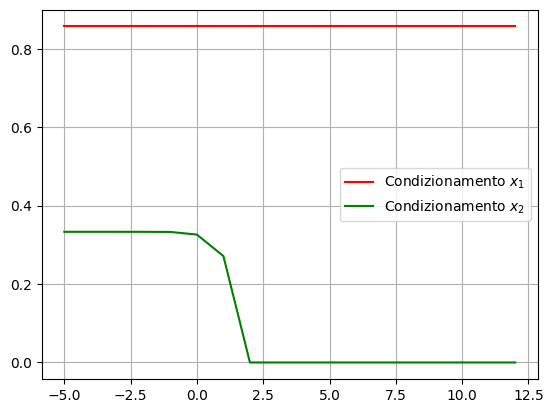

In [34]:
fp = lambda x, b: x + 2*b
f = lambda x, b, c: .5 * x**2 + 2*b*x - c

# K = |(f'(x)·x)/f(x)|
K1 = np.abs((fp(x1s, b_val) * x1s)/f(x1s, b_val, c_vals))
K2 = np.abs((fp(x2s, b_val) * x2s)/f(x2s, b_val, c_vals))
print(K1)
print(K2)

plt.plot(
    i_range, K1, "r", 
    i_range, K2, "g"
)
plt.legend(["Condizionamento $x_1$", "Condizionamento $x_2$"])
plt.grid(True)
plt.show()

- c) Nel caso in cui una delle due formule risulti mal condizionata, proporre una soluzione algebricamente equivalente che non sia malcondizionata.

                                                                                    3 punti

                                                                        Totale 9 punti

## Domanda intelligenza artificiale

 Limiti delle reti MLP (multilayer Perceptron) ed introduzione delle Reti neurali Convoluzionali. 
- Architettura di una rete neurale convoluzionale: strati convoluzionali, attivazione non lineare e pooling + parte fully connected.
- Loss function per il task della regressione.  Training di una rete. 
- Cenni sull'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi ditutti i layer .
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch.
                                                                                [7  punti]
